<font style='font-size:1.5em'>**💻 Week 07 lab – Data visualisation under the grammar of graphics framework** </font>

<font style='font-size:1.2em'>DS105A – Data for Data Science</font>

**AUTHORS:**  Dr. [Jon Cardoso-Silva](https://jonjoncardoso.github.io)

**DEPARTMENT:** [LSE Data Science Institute](https://lse.ac.uk/dsi)

**OBJECTIVE**: Learn about the grammar of graphics framework and how to use it in Python (with the packages `plotnine` and `altair`).

**LAST REVISION:** 9 November 2023

::: callout-important

## This lab is part of the ![](/figures/logos/GENIAL_favicon.png){width=1em}  [<span style="font-weight:bold"> GEN<font color='#D55816'>IA</font>L</span> project](https://lse-dsi.github.io/genial). 

When you reach Part III of this lab, read the specific instructions for GENIAL participants.

:::


--- 

**⚙️ The setup**

We will use the following libraries today:

In [ ]:
import os
import json
import datetime

import pandas as pd
import matplotlib.pyplot as plt

from plotnine import *
from pprint import pprint
from tqdm.notebook import tqdm

# Configure the notebook to show images in high resolution
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

**🗄️ Load the data**

This is the same, small dataset we were exploring yesterday in the lecture:


In [ ]:
df_reddit = pd.read_csv('./data/reddit_posts.csv')

# Part 1: Recap of data types (15 min)

👉 This is not a 👨🏻‍🏫 **TEACHING MOMENT** yet. You can start working on this part as soon as you come to the lab.

In [ ]:
df_reddit.dtypes

**🎯 ACTION POINTS:**

Create cells of code or markdown below as appropriate, to respond to the following questions:

1. Identify the column that represents a date or time and visualise its contents. 


    a. What do you think the numbers represent? 

    b. What do you think `UTC` means?

    c. Use the following template to apply a function to every single element in the column and convert the numbers to a datetime object. 

    ```python
    df_reddit['<column>'] = df_reddit['<column>'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    ```

2. Remember, there are [various ways to define a numerical column's type](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dtypes). More specifically, when it comes to integers, you can choose if you want:

    - `int8`: range from -128 to 127
    - `int16`: range from -32768 to 32767
    - `int32`: range from -2147483648 to 2147483647
    - `int64`: range from -9223372036854775808 to 9223372036854775807

    ([source](https://numpy.org/doc/stable/reference/arrays.scalars.html#integer-types)).
    
    Let's not be wasteful! Considering the columns with integer data, consider if the integer type used is unnecessarily large. If so, change these columns to a more size-efficient integer type.

3. ♻️ We can be even _more_ sustainable than that! Instead of loading the Data Frame in wasteful object types and _then_ pre-processing it, we can load it directly in the adequate data types by changing some parameters of the `pd.read_csv()` function. 

    a. Read the documentation of the `pd.read_csv()` function and figure out how to use its `dtype` (it expects a dictionary) parameters to load the data frame directly in the suitable data types. 
    
    b. If time allows: can you figure out how to use the `parse_dates` parameter (in combination with the `date_parser` parameter) to load the date column directly as a datetime object?


**👨🏻‍🏫 TEACHING MOMENT:**

- At the end of the 20 minutes, your class teacher will show you a solution and explain why using efficient data types is important.

# Part 2: Customising a bar plot (25 min)

👨🏻‍🏫 **THIS IS A TEACHING MOMENT**

## Plots are made of layers!

We will use the creation of a barplot to illustrate how the grammar of graphics works. You can read more about it in the references below:
- ["The Layered Grammar of Graphics"](http://vita.had.co.nz/papers/layered-grammar.pdf)
- [R for Data Science, Chapter 3: Data Visualisation](https://r4ds.had.co.nz/data-visualisation.html#creating-a-ggplot)

![Screenshot 2023-11-08 at 16.56.12.png](<attachment:Screenshot 2023-11-08 at 16.56.12.png>)

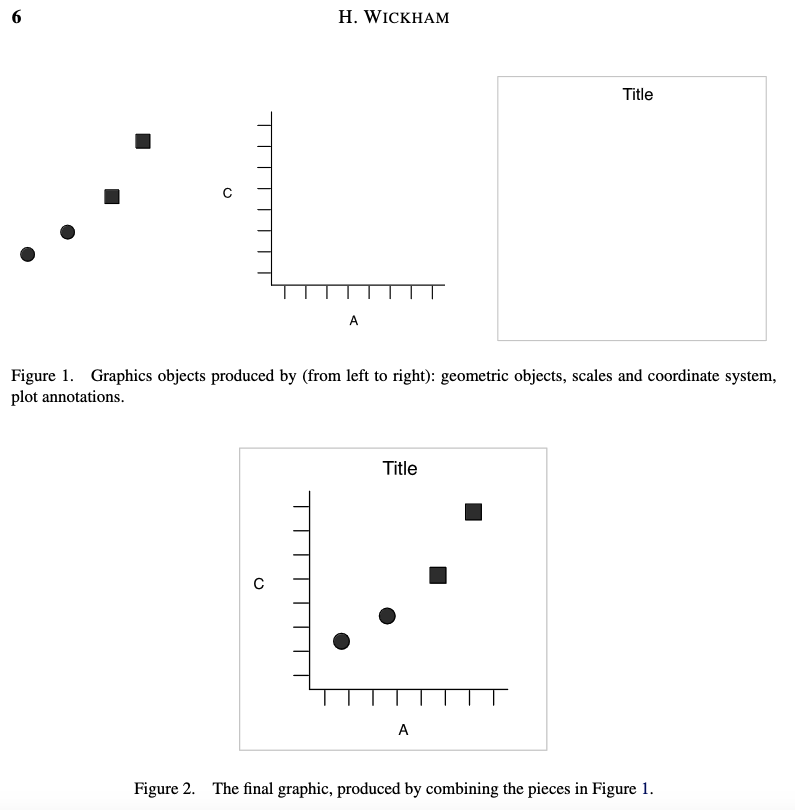

## How to create a barplot with `plotnine`

Let's use these principles to build all the layers of a barplot. We will use the `plotnine` package, a Python implementation of the `ggplot2` package in R.

Say we want to convert the summarised data below into a barplot:

In [ ]:
df_reddit['subreddit_name_prefixed'].value_counts().head()

First of all, we need to convert the result above to a DataFrame (we can't work with a Series):


In [ ]:
# Let's stablish the practice of creating a new dataframe for each plot
# This way, we avoid modifying the original dataframe by accident
plot_df = df_reddit['subreddit_name_prefixed'].value_counts().to_frame().reset_index()
plot_df.head()

Ops. I have to fix the column names:


In [ ]:
plot_df.columns = ['subreddit', 'count']

Now think about the **mapping** of the coordinates of the plot:

**What goes in the X axis?** The `subreddit_name_prefixed` column.

**What goes in the Y axis?** The `count` column.

We specify this mapping by using the `aes()` function (which stands for "aesthetics"):

In [ ]:
#This is how you specify the axis
g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) 
)

g

The Y-axis is a bit weird. I guess the text is too long. Let's **flip the coordinates**:

In [ ]:
g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    coord_flip()
)

# This looks nicer!
g

<div style="width:50%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

💡 Annoyingly, bar plots don't work well if the numerical values are on the X-axis. We always need to use `coord_flip()` like above!

</div>

That is, the following would work _now_ but once we add the bar chart layer, it will break:

```python
g = ggplot(plot_df, mapping=aes(x="count", y="subreddit_name_prefixed"))
```

### You can customise axes!

Axes, just like colours, are **scales** of the plot. We can customise them with the `scale_*_*` functions, where the first `*` is the type of scale (e.g. in case of axes,`scale_x` or `scale_y`) and the second `*` is the type of scale (e.g. `scale_x_continuous`, if the scale is a continous numerical scale).

In [ ]:
#Let's change the title of the count axis

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_y_continuous(name="Number of posts") +  # Change the Y-axis before flipping it
    coord_flip()
)

g

In [ ]:
# We could choose to change the labels of that axis

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_y_continuous(name="Number of posts", breaks=range(0, 20+2, 2)) +  
    coord_flip()
)

g

🗣️ **CLASSROOM DISCUSSION:** Why do you think we had to do `range(0, 20+2, 2)`? Why not just `range(0, 20)`?

### Now, let's actually add the plot!

The components of the plot that we have seen so far are called **scales**. They are the axes, the colours, the size of the points, etc. But to actually add the plot, we need to add a **geom** (a geometric object) of the type of plot we want.

In this case, let's use the `geom_col()` function, where `col` stands for "column" (as in "column chart"):

In [ ]:
g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_y_continuous(name="Number of posts", breaks=range(0, 20+2, 2)) +  
    coord_flip() +
    geom_col()
)

# This is a little bit more useful but hard to read because there is no order
g

<div style="width:50%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

💡 How do I know which `geoms` are available? Check the [documentation](https://plotnine.readthedocs.io/en/stable/api.html#geoms), of course!

</div>


### Did you find the lack of order weird?

That is because plotnine will always order the axis in alphabetical order. There are two ways to specify the order of the axis:

1. **The easy way:** Use the `limits` parameter of the `scale_x_discrete()` function

2. **The robust way:** Convert the X-axis to a Categorical data type, setting the order of the categories as you do so. This is robust because we can reuse the same column in multiple plots without the need to tweak the `limits` parameter every time.

Either way we choose, we have to create a list of the categories in the order we want them to appear. 

🎉 Luckily for us, our `plot_df` was already sorted, as we created it with the `value_counts()` function. So it is just a matter using the values of the `subreddit_name_prefixed` column as is:

In [ ]:
# Print this list afterwards if you want to see the order
order_subreddits = plot_df['subreddit'].tolist()

In [ ]:
# Now this looks ordered!
g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_x_discrete(limits=order_subreddits) +
    scale_y_continuous(name="Number of posts", breaks=range(0, 20+2, 2)) +  
    coord_flip() +
    geom_col()
)

g

**Do you want the order to be reversed?**

In [ ]:
# Python's own reversed function does what you expect but I need to convert it, again, to a list
order_subreddits = list(reversed(plot_df['subreddit'].tolist()))

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_x_discrete(limits=order_subreddits) +
    scale_y_continuous(name="Number of posts", breaks=range(0, 20+2, 2)) +  
    coord_flip() +
    geom_col()
)

g

### Don't like the default aesthetic? Change the theme

In [ ]:
g + theme_minimal()

<div style="width:50%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

💡 Where can you find other default themes? Err... in the [documentation](https://plotnine.readthedocs.io/en/stable/api.html#themes), of course!

Better yet, you can **customise** the theme to your liking. You know [where](https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme.html#plotnine.themes.theme) to find it...

</div>

### Add in more aesthetics

Each `geom` 'listens' to a specific set of aesthetics. 

If you go to the [documentation of the `geom_col()` function](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_col.html#plotnine.geoms.geom_col), you will see that the `x` and `y` aesthetics are mandatory, but there are others which are optional:

<table class="align-default table" border="0">
<thead>
<tr class="row-odd"><th class="head"><p>Aesthetic</p></th>
<th class="head"><p>Default value</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>x</strong></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p><strong>y</strong></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>alpha</p></td>
<td><p><code class="code python docutils literal notranslate"><span class="mi"><span class="pre">1</span></span></code></p></td>
</tr>
<tr class="row-odd"><td><p>color</p></td>
<td><p><code class="code python docutils literal notranslate"><span class="kc"><span class="pre">None</span></span></code></p></td>
</tr>
<tr class="row-even"><td><p>fill</p></td>
<td><p><code class="code python docutils literal notranslate"><span class="s1"><span class="pre">'#595959'</span></span></code></p></td>
</tr>
<tr class="row-odd"><td><p>group</p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>linetype</p></td>
<td><p><code class="code python docutils literal notranslate"><span class="s1"><span class="pre">'solid'</span></span></code></p></td>
</tr>
<tr class="row-odd"><td><p>size</p></td>
<td><p><code class="code python docutils literal notranslate"><span class="mf"><span class="pre">0.5</span></span></code></p></td>
</tr>
</tbody>
</table>

(_I literally inspected the HTML of this table from the documentation page and pasted it here. Effective laziness!_)

In [ ]:
order_subreddits = list(reversed(plot_df['subreddit'].tolist()))

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_x_discrete(name="Subreddit Names", limits=order_subreddits) +
    scale_y_continuous(name="Number of posts", breaks=range(0, 20+2, 2)) +  
    coord_flip() +
    geom_col(fill='red') + # THIS IS THE IMPORTANT BIT
    theme_minimal() +
    theme(figure_size=(8, 5)) + # Notice that you can tweak the size of the figure
    labs(title="I could fix the colour used to fill the bars!")
)

g

In [ ]:
order_subreddits = list(reversed(plot_df['subreddit'].tolist()))

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count", fill="count")) +
    scale_x_discrete(name="Subreddit Names", limits=order_subreddits) +
    scale_y_continuous(name="Number of posts", breaks=range(0, 20+2, 2)) +  
    coord_flip() +
    geom_col() + 
    theme_minimal() +
    theme(figure_size=(8, 5)) + 
    labs(title="OR, I could map the fill to a column (count)!",
         subtitle="Because count is a numerical variable, plotnine automatically converts it to a gradient scale",)
)

g

<div style="width:50%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

💡 Don't like the default colour gradient scale? Check the [documentation of the `scale_fill_*` functions](https://plotnine.readthedocs.io/en/stable/api.html#color-and-fill-scales) to see how to change it.

</div>

### Who said you MUST stick to a single `geom`?

Let's add a `geom_text()` to show the actual values of the bars:

In [ ]:
order_subreddits = list(reversed(plot_df['subreddit'].tolist()))

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count", fill="count", label="count")) + # I added a label aesthetic here
    scale_x_discrete(name="Subreddit Names", limits=order_subreddits) +
    scale_y_continuous(name="Number of posts", breaks=range(0, 20+2, 2)) +  
    coord_flip() +
    geom_col() + 
    geom_text(mapping=aes(y="count+0.5"), size=12) + # THIS IS THE IMPORTANT BIT. Notice how I redefined the y-axis just for the text
    theme_minimal() +
    theme(figure_size=(8, 8)) + 
    labs(title="I can add text!")
)

g

# Part 3: 🥇 Can you replicate the following plot? (35 min)

![](./figures/part3-plot.svg){style="width:70%"}

It might not be the most useful plot in the world, but it is a good exercise to practice the grammar of graphics.

It is likely that you won't have time to finish this part in the lab. That's fine! **Just see how far you can get, and practice it at home.**

---


<details style="border: 1px solid #D55816; border-radius: 5px; padding: 0.5em;">
<summary style="font-weight:bold;margin-top:0.5em;margin-bottom:0.5em;font-size:1.4em;"> I am part of the <span style="font-weight:bold"> GEN<font color='#D55816'>IA</font>L</span> project (there's 🆕 stuff)</summary>

If you are participating in the <span style="font-weight:bold"> GEN<font color='#D55816'>IA</font>L</span> project, you are asked to:

- Work independently (not in groups or pairs). This time, your class teacher can give you prompt engineering tips.

- Have **only** the following tabs open in your browser:

    1. These lab instructions or any past course materials.

    2. The [ChatGPT](https://chat.openai.com) website (**open a new chat window and name it 'DS105A - Week 07'**)

    3. Any of the 🖇️ **Useful links** at the top of this notebook

- What you **CANNOT** do:

    1. Use a search engine for help

    2. Use any other websites (for example, **do not** use StackOverflow or GitHub here)

    3. Talk to your classmates

- Be aware of how useful (or not) ChatGPT was in helping you answer the questions in this section.

- **Fill out this brief survey at the end of the lab:** 🔗 [link](https://forms.office.com/e/h0dXriciyy) (requires LSE login)


<details><summary>🆕 Click HERE to see a few prompt engineering tips</summary>

1. Be smart about **context**! ChatGPT does not know about your lab instructions. For example, you could make your first message to ChatGPT be something like:

    ```text
    I have a pandas DataFrame that looks like this:

    | id      | title                                                                                           | post_hint   | created_utc         |   ups |   downs |   upvote_ratio |   score | subreddit_id   | subreddit_name_prefixed   |   subreddit_subscribers | over_18   |   num_comments | is_original_content   | is_self   | is_video   | author   | author_fullname   | author_premium   | content_categories   | edited   | domain    |
    |:--------|:------------------------------------------------------------------------------------------------|:------------|:--------------------|------:|--------:|---------------:|--------:|:---------------|:--------------------------|------------------------:|:----------|---------------:|:----------------------|:----------|:-----------|:---------|:------------------|:-----------------|:---------------------|:---------|:----------|
    | 17px794 | On this day 3 years ago Rudy Giuliani held a press conference at Four Seasons Total Landscaping | image       | 2023-11-07 15:46:47 | 70187 |       0 |           0.91 |   70187 | t5_2qh0u       | r/pics                    |                30277898 | False     |           2580 | False                 | False     | False      | ohnoh18  | t2_3qo6zvfi       | True             | ['photography']      | False    | i.redd.it |

    Just acknowledge it for now. I will ask you questions about it later.
    ```

2. **Specify the Python package and focus on what's essential first!** If you ask, 'I need to create a plot in Python with ...' ChatGPT will give you `matplotlib` code because `plotnine` is not as popular. 

    ```markdown
    I need the bare minimal of a `plotnine` code to produce a lot of circles as follows:

    - X axis: Time where the post was created
    - Y axis: Subreddit name
    - Colour: Number of comments
    - Size: Number of comments, too.
    ```

3. **Increasingly add details and complexity.** For example, 'now I need to add a title' or 'now I need to rename the colour scale'.

4. **Debug effectively.** Build on what you asked before: 'the previous code works, but it's not really what I want. The colour was applied just to the border of the points, but I want it to be applied to the whole point. Modify the code to do that.'

</details>

</details>

<br>

<details style="border: 1px solid gray; border-radius: 5px; padding: 0.5em;">
<summary style="font-weight:bold;margin-top:0.5em;margin-bottom:0.5em;font-size:1.4em;"> I'm not participating in the GENIAL project :\</summary>

In case you are not participating in the <span style="font-weight:bold"> GEN<font color='#D55816'>IA</font>L</span> project, you can work in pairs or small groups to answer the questions in this section. You can also ask the class teacher for help if you get stuck.

We suggest you have these tabs open in your browser:

1. Any of the 🖇️ **Useful links** at the top of this notebook

</details>

(GENIAL participants: don't forget to fill out the survey!)

# Part 4: Form groups for the final project (15 min)


🎯 **ACTION POINTS:**

1. Talk to others around you and try to form a group of, ideally, 3 people. 

    - Your class teacher might be able to allow a group of 4 people if there are odd numbers.
    - You need your class teachers' explicit permission to form a group that is not made of 3 people.
    
    
2. If you don't know anyone in your class group or cannot form a group of 3 people, let your class teacher know. They will help facilitate the process.

3. Fill out the form below.

    🖇️ [LINK TO THE GROUP COMPOSITION FORM](https://forms.office.com/e/0JvP7Yz2Fx)

4. (BONUS) Start discussion your next steps. When do you want to meet for a first brainstorming of ideas? 

    a. Next week, on Week 08, you will be asked to present a 3-slide & 10-minute presentation with a **pitch** of what you want to do in your final projects. This assignment is **formative** (not part of your course grade). You will show it on the big screen at the Data Science Institute's Visualisation Studio. 

    b. You are to tell us what data sources you will use, what questions you want to answer, and what visualisations you want to create.

    c. More details about the requirements of the final project will be shared later on Moodle or the course website.


----

**Generative AI acknowledgement**

I wrote this notebook on VSCode with GitHub Copilot and Grammarly extensions activated. What does this mean?

- When writing text, I let Copilot autocomplete most sentences for me, but I constantly needed to go back and rephrase things. I had to cut a lot of text to counteract Copilot's tendency towards repetition (_'This means that Copilot repeats a lot, by simply repeating the same concepts over and over again, thus re-stating the same concepts in different ways.'_). I also edited it to make it more like 'my voice', if that makes sense.
- After writing a paragraph, I would wait for Grammarly to trigger and highlight any mistakes, typos or automatic rephrasing suggestions. If I liked them, I would go ahead and accept them. If I didn't, I would ignore them. 
- For code, I usually add a line with Python comments (starting with `#`) explaining what I want to do next. Then, I let Copilot autocomplete the code. I run the code to check it does what I want, but I commonly go back and edit it to make it more concise – I find the code produced by Copilot to be too lengthy and unnecessarily complex sometimes.